In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib

import pandas as pd
import scipy.io
import numpy as np
import seaborn
import math

In [4]:
df = pd.read_csv('data/neuron_post_processing_fixed.csv')
df.head()

,neuron,time,mean,std,sum,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.047619,0.218218,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,2,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Network science of biological systems at different scales: A review

![title](img/G1.png)

[Source](https://www.sciencedirect.com/science/article/pii/S1571064517301501)

In [5]:
group_time = 100

df['time (ms)'] = df['time'].apply(lambda x: math.floor((x / group_time)) * group_time)
df.head()

,neuron,time,mean,std,sum,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,time (ms)
0,0,0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.047619,0.218218,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_group_time = df[['neuron', 'time (ms)', 'sum']].\
    groupby(by=['neuron','time (ms)'], as_index=False).sum()
    
df_group_time.head()

,neuron,time (ms),sum
0,0,0,12
1,0,100,13
2,0,200,8
3,0,300,12
4,0,400,14


In [7]:
TOP_N = 10

top_n_neurons = \
    df_group_time[['neuron', 'sum']].\
        groupby(by='neuron', as_index=False)\
            .sum().\
                sort_values(by=['sum'], ascending=False)['neuron'][:TOP_N].tolist()
                
top_n_neurons

[185, 52, 24, 214, 248, 168, 130, 315, 318, 216]

In [8]:
df_group_plot = df_group_time.loc[df_group_time['neuron'].isin(top_n_neurons)].\
                    groupby(by=['time (ms)','neuron']).sum().unstack()
    
df_group_plot = df_group_plot[df_group_plot.columns.set_levels(top_n_neurons, level=1)]

## Graph B

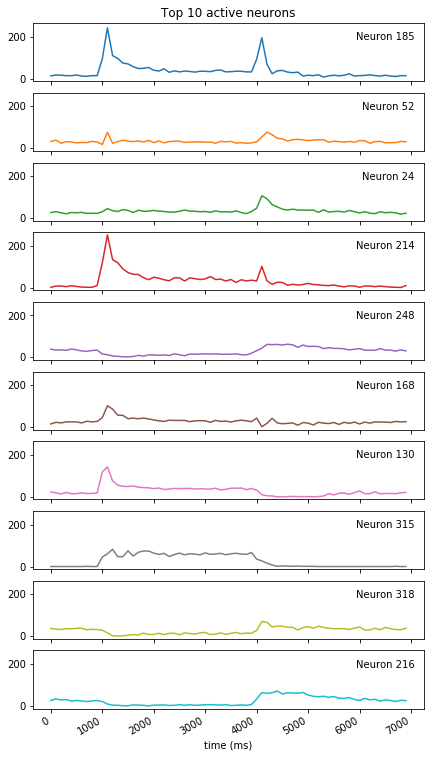

In [9]:
_ = df_group_plot.plot(subplots=True, figsize=(7,14), sharey=True)

__ = [ax.legend(loc=1,
                frameon=False,
                handlelength=0).\
                texts[0].set_text('Neuron ' + str(top_n_neurons[idx])) \
      for idx, ax in enumerate(plt.gcf().axes)]

__ = _[0].set_title('Top {} active neurons'.format(TOP_N))

## Graph C

In [10]:
df_group_time = df_group_time.rename({'sum':'Neuron'}, axis='columns')

In [16]:
TOP_N = 10

top_n_neurons = \
    df_group_time[['neuron', 'Neuron']].\
        groupby(by='neuron', as_index=False)\
            .sum().\
                sort_values(by=['Neuron'], ascending=False)['neuron'][:TOP_N].tolist()
                
print(top_n_neurons)

[185, 52, 24, 214, 248, 168, 130, 315, 318, 216]


In [17]:
df_corr_10 = df_group_time.loc[df_group_time['neuron'].isin(top_n_neurons)].\
                 groupby(by=['time (ms)','neuron']).sum().unstack().corr(method='pearson')

#df_corr_10 = df_corr_10[df_corr_10.columns.set_levels(top_n_neurons, level=1)]

df_corr_10.head()

Neuron                                                    \
neuron              24        52        130       168       185       214   
       neuron                                                               
Neuron 24      1.000000  0.713549 -0.106670 -0.045744  0.548258  0.297713   
       52      0.713549  1.000000 -0.053915  0.120259  0.446828  0.307511   
       130    -0.106670 -0.053915  1.000000  0.814963  0.656906  0.838644   
       168    -0.045744  0.120259  0.814963  1.000000  0.625176  0.801655   
       185     0.548258  0.446828  0.656906  0.625176  1.000000  0.906167   

                                                       
neuron              216       248       315       318  
       neuron                                          
Neuron 24      0.448190  0.309576  0.044759  0.401564  
       52      0.471954  0.407367 -0.136675  0.405969  
       130    -0.665872 -0.736653  0.691794 -0.638249  
       168    -0.502921 -0.576258  0.556374 -0.580395  
       185    -0.136900 -0.303490  0.454527 -0.162236

In [18]:
df_corr_10.columns

MultiIndex(levels=[['Neuron'], [24, 52, 130, 168, 185, 214, 216, 248, 315, 318]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'neuron'])

In [19]:
import seaborn as sns

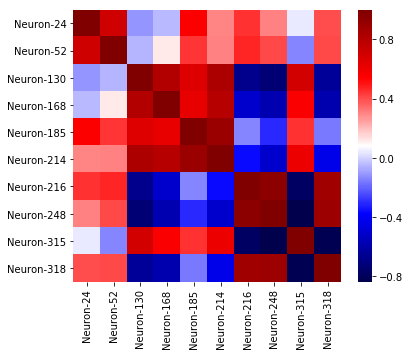

In [21]:
fig, ax = plt.subplots(figsize=(6,5)) 
sns.heatmap(df_corr_10, cmap='seismic')
_ = ax.set_ylabel('')    
_ = ax.set_xlabel('')

In [22]:
df_corr = df_group_time.\
                 groupby(by=['time (ms)','neuron']).sum().unstack().corr(method='pearson')
df_corr.head()

Neuron                                                    \
neuron              0         1         2         3         4         5     
       neuron                                                               
Neuron 0       1.000000  0.493311 -0.353864  0.121851  0.334601  0.243360   
       1       0.493311  1.000000 -0.003087  0.133458  0.385215  0.312137   
       2      -0.353864 -0.003087  1.000000  0.633332  0.479451  0.501478   
       3       0.121851  0.133458  0.633332  1.000000  0.876969  0.930725   
       4       0.334601  0.385215  0.479451  0.876969  1.000000  0.964363   

                                                         ...               \
neuron              6         7         8         9      ...          309   
       neuron                                            ...                
Neuron 0       0.728744  0.134260  0.103436  0.871038    ...     0.239748   
       1       0.547897  0.133484  0.210007  0.622886    ...     0.431555   
       2      -0.055849  0.582854  0.501886 -0.277463    ...     0.661346   
       3       0.368715  0.967003  0.896568  0.092960    ...     0.773221   
       4       0.600428  0.923659  0.884711  0.348690    ...     0.850083   

                                                                           \
neuron              310       311       312       313       314       315   
       neuron                                                               
Neuron 0      -0.619058 -0.021115  0.363660 -0.264175 -0.393282 -0.695220   
       1      -0.000934  0.186518  0.463857 -0.064781 -0.149855  0.092589   
       2       0.793399  0.828124  0.463728  0.861596  0.859608  0.582130   
       3       0.511800  0.767525  0.412389  0.589084  0.513365  0.165683   
       4       0.379805  0.647754  0.588929  0.331522  0.236508  0.126503   

                                             
neuron              316       317       318  
       neuron                                
Neuron 0       0.138580  0.091930  0.878811  
       1       0.145043  0.284584  0.275918  
       2       0.523885  0.624154 -0.444320  
       3       0.943804  0.872289  0.046488  
       4       0.866881  0.896494  0.175564  

[5 rows x 319 columns]

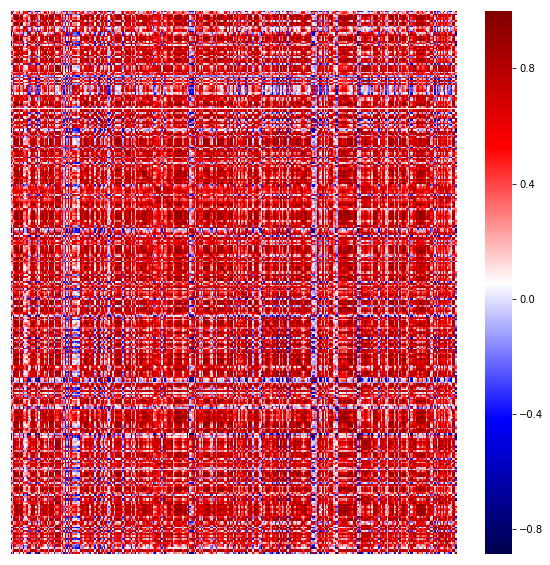

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=[], yticklabels=[], cmap='seismic')
_ = ax.set_ylabel('')    
_ = ax.set_xlabel('')

## First threshold

In [91]:
to_replace = np.arange(-0.74, 0.75, 0.01).round(3)
to_replace

array([-0.74, -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66,
       -0.65, -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57,
       -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48,
       -0.47, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39,
       -0.38, -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 ,
       -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21,
       -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12,
       -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03,
       -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,
        0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,
        0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,
        0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,
        0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,
        0.43,  0.44,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,
        0.52,  0.53,

In [36]:
df_corr = df_corr.round(2).replace(to_replace, np.nan)
df_corr.head()

Neuron                                              ...          \
neuron           0    1    2    3    4     5   6     7    8   9   ... 309 310   
       neuron                                                     ...           
Neuron 0         1.0  NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN NaN ... NaN NaN   
       1         NaN  1.0  NaN  NaN  NaN   NaN NaN   NaN  NaN NaN ... NaN NaN   
       2         NaN  NaN  1.0  NaN  NaN   NaN NaN   NaN  NaN NaN ... NaN NaN   
       3         NaN  NaN  NaN  1.0  NaN  0.93 NaN  0.97  0.9 NaN ... NaN NaN   
       4         NaN  NaN  NaN  NaN  1.0  0.96 NaN  0.92  NaN NaN ... NaN NaN   

                                                  
neuron        311 312 313 314 315   316  317 318  
       neuron                                     
Neuron 0      NaN NaN NaN NaN NaN   NaN  NaN NaN  
       1      NaN NaN NaN NaN NaN   NaN  NaN NaN  
       2      NaN NaN NaN NaN NaN   NaN  NaN NaN  
       3      NaN NaN NaN NaN NaN  0.94  NaN NaN  
       4      NaN NaN NaN NaN NaN   NaN  0.9 NaN  

[5 rows x 319 columns]

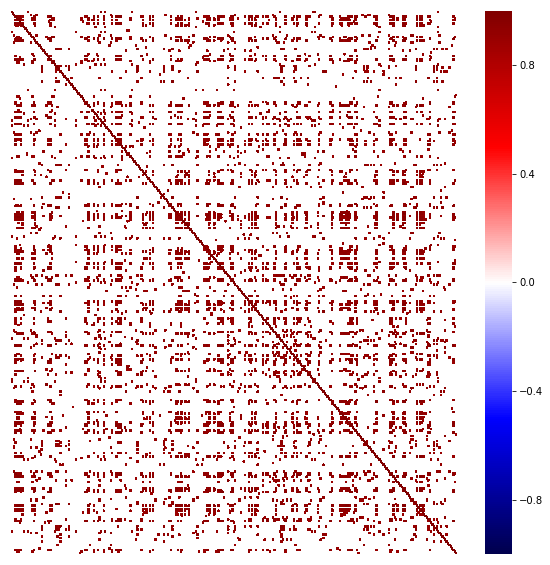

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=[], yticklabels=[], cmap='seismic', vmin=-1, vmax=1)
_ = ax.set_ylabel('')    
_ = ax.set_xlabel('')

## Second threshold

In [39]:
to_replace = np.arange(-0.90, 0.90, 0.01).round(3)
to_replace

array([-0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82,
       -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73,
       -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65, -0.64,
       -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56, -0.55,
       -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47, -0.46,
       -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38, -0.37,
       -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29, -0.28,
       -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 , -0.19,
       -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1 ,
       -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01,
        0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,

In [40]:
df_corr = df_corr.round(2).replace(to_replace, np.nan)
df_corr.head()

Neuron                                              ...          \
neuron           0    1    2    3    4     5   6     7    8   9   ... 309 310   
       neuron                                                     ...           
Neuron 0         1.0  NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN NaN ... NaN NaN   
       1         NaN  1.0  NaN  NaN  NaN   NaN NaN   NaN  NaN NaN ... NaN NaN   
       2         NaN  NaN  1.0  NaN  NaN   NaN NaN   NaN  NaN NaN ... NaN NaN   
       3         NaN  NaN  NaN  1.0  NaN  0.93 NaN  0.97  0.9 NaN ... NaN NaN   
       4         NaN  NaN  NaN  NaN  1.0  0.96 NaN  0.92  NaN NaN ... NaN NaN   

                                                  
neuron        311 312 313 314 315   316  317 318  
       neuron                                     
Neuron 0      NaN NaN NaN NaN NaN   NaN  NaN NaN  
       1      NaN NaN NaN NaN NaN   NaN  NaN NaN  
       2      NaN NaN NaN NaN NaN   NaN  NaN NaN  
       3      NaN NaN NaN NaN NaN  0.94  NaN NaN  
       4      NaN NaN NaN NaN NaN   NaN  0.9 NaN  

[5 rows x 319 columns]

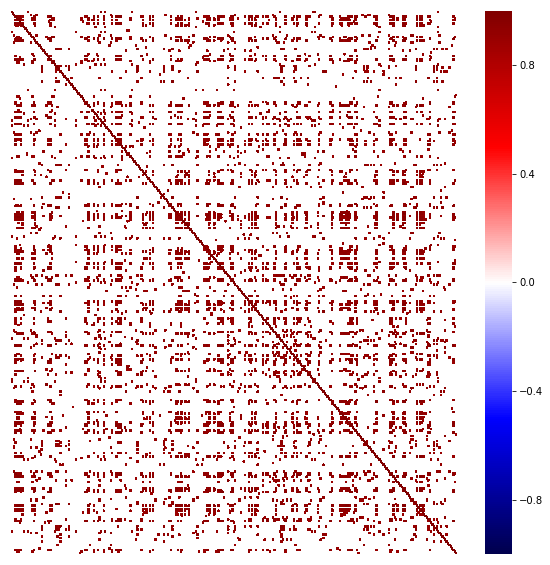

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=[], yticklabels=[], cmap='seismic', vmin=-1, vmax=1)
_ = ax.set_ylabel('')    
_ = ax.set_xlabel('')

## Networkx

In [78]:
import networkx as nx

In [91]:
G = nx.Graph()

for idx, row in df_corr.iterrows():
    neuron_id = idx[1]

    for sub_idx, sub_row in row.dropna().iteritems():
        sub_neuron_id = sub_idx[1]
        correlation = sub_row
        
        if neuron_id != sub_neuron_id:
        
            G.add_edge(neuron_id, 
                       sub_neuron_id, 
                       weight=correlation)

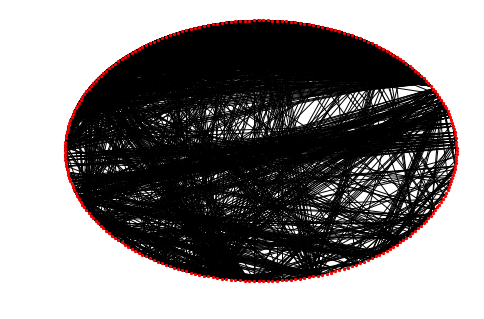

In [107]:
nx.draw_circular(G, figsize=(20,10), node_size=5)

In [111]:
%%time
pagerank = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

CPU times: user 1.34 s, sys: 14 µs, total: 1.34 s
Wall time: 1.34 s


## Gephy

In [118]:
df_out = nx.to_pandas_edgelist(G)
df_out.head()

,source,target,weight
0,0,12,0.90
1,0,64,0.94
2,0,67,0.92
3,0,86,0.90
4,0,132,0.92


In [119]:
df_out.to_csv('testing.csv', index=False)